In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
# Get data
dati_nazione = pd.read_csv('COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv', sep=',', header=0)
dati_regioni = pd.read_csv('COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv', sep=',', header=0)
dati_province = pd.read_csv('COVID-19/dati-province/dpc-covid19-ita-province.csv', sep=',', header=0)
x = range(0,len(dati_nazione.data))

In [17]:
# Temp removal of last wrong data (March the 10th). Valid just for today (March the 11th).
dati_nazione.drop(dati_nazione.tail(1).index,inplace=True)

## Casi nazionali

## Modelli

### Esponenziale

$$f(x) = a\cdot e^{b\cdot x}$$

### Logistico

$$f(x) = \frac{L}{1+e^{k\cdot(x-m)}}$$

In [16]:
def exponential(x, a, b):
    return a * np.exp(b * x)

def logistic(x, L, k, m):
    return L /(1+np.exp(-k*(x-m)))

def prettyplot(plt, x, y, f1, f2, c1, c2):
    """
    Plot data and models of both exponential and logistic function.
    
    Parameters
    ----------
        x: x values
        y: y values
        f1: model 1 function
        f2: model 2 function
        c1: coefficients of model 1
        c2: coefficients of model 2
    Returns
    -------
        plot
    """
    plt.plot(x, f1(x, *c1), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(c1))
    plt.plot(x, f2(x, *c2), 'g-', label='fit: L=%5.3f, k=%5.3f, m=%5.3f' % tuple(c2))
    plt.scatter(x, y, label='dati nazionali')
    plt.title('Andamento Nazionale')
    plt.xlabel('giorni')
    plt.ylabel('Totale casi attualmente positivi')
    plt.legend()         

In [ ]:
# Do curve fitting & plot results
coeff_e, cov_e = curve_fit(exponential, x, dati_nazione.totale_attualmente_positivi)
coeff_l, cov_l = curve_fit(logistic, x, dati_nazione.totale_attualmente_positivi, method='dogbox')

prettyplot(plt, x, dati_nazione.totale_attualmente_positivi, exponential, logistic, coeff_e, coeff_l)
plt.show()    

In [10]:
forecast_exp = func(15, *coeff)
forecast_log = logistic(15, *coeff_logistic)
round(forecast_log)

9866.0

## Previsioni a 50 giorni

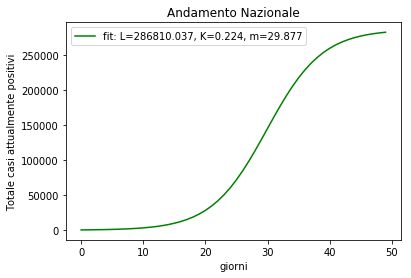

In [21]:
xf = range(0, 50)
plt.plot(xf, logistic(xf, *coeff_logistic), 'g-', label='fit: L=%5.3f, K=%5.3f, m=%5.3f' % tuple(coeff_logistic))
plt.title('Andamento Nazionale')
plt.xlabel('giorni')
plt.ylabel('Totale casi attualmente positivi')
plt.legend()
plt.show()

## Casi Regionali

In [4]:
dati_regioni.groupby('denominazione_regione').max().sort_values('nuovi_attualmente_positivi')

,data,stato,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
denominazione_regione,,,,,,,,,,,,,,,
Basilicata,2020-03-10 18:00:00,ITA,17,40.639471,15.805148,2,0,2,5,7,2,0,0,7,148
Calabria,2020-03-10 18:00:00,ITA,18,38.905976,16.594402,8,2,10,4,11,5,2,0,13,360
Molise,2020-03-10 18:00:00,ITA,14,41.557748,14.659161,4,3,6,9,15,5,0,0,15,225
Valle d'Aosta,2020-03-10 18:00:00,ITA,2,45.737503,7.320149,4,0,4,15,17,6,0,0,17,89
Sardegna,2020-03-10 18:00:00,ITA,20,39.215312,9.110616,9,0,9,11,20,8,0,0,20,204
Umbria,2020-03-10 18:00:00,ITA,10,43.106758,12.388247,8,2,10,27,37,9,0,0,37,260
Abruzzo,2020-03-10 18:00:00,ITA,13,42.351222,13.398438,25,9,26,11,37,13,0,1,38,310
Puglia,2020-03-10 18:00:00,ITA,16,41.125596,16.867367,28,6,34,21,55,13,1,3,59,747
Trento,2020-03-10 18:00:00,ITA,4,46.068935,11.121231,19,3,22,28,50,17,2,0,52,399


In [5]:
dati_lombardia = dati_regioni.loc[dati_regioni['denominazione_regione'] == 'Lombardia']
dati_lazio = dati_regioni.loc[dati_regioni['denominazione_regione'] == 'Lazio']
x = range(0,len(dati_lombardia['data']))

In [9]:
dati_lombardia

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
9,2020-02-24 18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,1463
30,2020-02-25 18:00:00,ITA,3,Lombardia,45.466794,9.190347,79,25,104,127,231,65,0,9,240,3700
51,2020-02-26 18:00:00,ITA,3,Lombardia,45.466794,9.190347,79,25,104,145,249,18,0,9,258,3208
72,2020-02-27 18:00:00,ITA,3,Lombardia,45.466794,9.190347,172,41,213,136,349,100,40,14,403,3320
93,2020-02-28 18:00:00,ITA,3,Lombardia,45.466794,9.190347,235,47,282,192,474,125,40,17,531,4835
114,2020-02-29 17:00:00,ITA,3,Lombardia,45.466794,9.190347,256,80,336,216,552,78,40,23,615,5723
135,2020-03-01 17:00:00,ITA,3,Lombardia,45.466794,9.190347,406,106,512,375,887,335,73,24,984,6879
156,2020-03-02 18:00:00,ITA,3,Lombardia,45.466794,9.190347,478,127,605,472,1077,190,139,38,1254,7925
177,2020-03-03 18:00:00,ITA,3,Lombardia,45.466794,9.190347,698,167,865,461,1326,249,139,55,1520,9577
198,2020-03-04 17:00:00,ITA,3,Lombardia,45.466794,9.190347,877,209,1086,411,1497,171,250,73,1820,12138


In [5]:
def func_l(x, a, b):
    return a * np.exp(b * x)

coeff_lazio, cov_lazio = curve_fit(func_l, x, dati_lazio.totale_attualmente_positivi)
yerr = 1/np.sqrt(dati_lazio.totale_attualmente_positivi)

plt.plot(x, func(x, *coeff_lazio), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(coeff_lazio))
plt.errorbar(x, dati_lazio.totale_attualmente_positivi, yerr=yerr, label='dati Regione Lazio', fmt='o')
plt.title('Andamento Regione Lazio')
plt.xlabel('giorni')
plt.ylabel('Totale casi attualmente positivi nel Lazio')
plt.legend()
plt.show()

NameError: name 'curve_fit' is not defined

In [8]:
func_l(15, *coeff_lazio)

138.04454849234057